# ***DATA SCIENCE/ SECTION 1/ PROJECT 1***

# 🏆**목표**
- 다음 분기에 어떤 게임을 설계해야 할까

---


# 💡반드시 들어가야 하는 내용(MISSION)
- 지역에 따라서 선호하는 게임 장르가 다를까
- 연도별 게임의 트렌드가 있을까
- 출고량의 높은 게임에 대한 분석 및 시각화 프로세스

---

## 🔢Section 1 Keywords
- sprint1
: EDA, Feature Engineering, Data Manipulation, Data Visualization, Data Wrangling
- sprint2
: Bayesian, Confidence Interval, Hypothesis Test, AB Test
- sprint3
: Linear Algebra, Dimensionality Reduction, PCA, Clustering, Gradient Descent

# 1. 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 2. 데이터 정제(EDA & Data Wrangling)

In [ ]:
# 필요없는 column 제거
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 결측치 확인 결과
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 중복값이 1개 존재. 그러나 Year이 NaN값이므로 결측치 제거할 때 제거할 것.
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


## 2-1. Year 

(array([  100.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16227.]),
 array([   0.,  202.,  404.,  606.,  808., 1010., 1212., 1414., 1616.,
        1818., 2020.]),
 <a list of 10 Patch objects>)

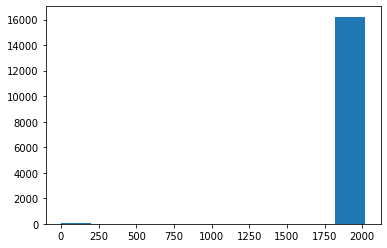

In [ ]:
# Year 확인해본 결과 전체중 0~250의 비정상적인 데이터가 있는 것으로 확인됨.
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
plt.hist(df.Year)

In [ ]:
# 원본데이터 유지
df_clean = df.copy()

In [ ]:
df_clean.shape[0]

16598

In [ ]:
# Year column에서 오류값 100 + 결측치 271 = 371개 확인
# 전체 데이터 16598 중 371은 약 2.2%로 drop해도 무관하다고 판단
Year_error = df_clean[ (df_clean['Year'].isnull()) | (df_clean['Year'] < 250)]
Year_error['Year'].count()

100

In [ ]:
# Year 결측값 drop
Year_error_index = Year_error.index
df_clean.drop(Year_error_index, inplace = True)
df_clean.reset_index(drop = True, inplace = True)


In [ ]:
df_clean['Year']=df_clean['Year'].astype(int)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16227 entries, 0 to 16226
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16227 non-null  object
 1   Platform     16227 non-null  object
 2   Year         16227 non-null  int64 
 3   Genre        16177 non-null  object
 4   Publisher    16191 non-null  object
 5   NA_Sales     16227 non-null  object
 6   EU_Sales     16227 non-null  object
 7   JP_Sales     16227 non-null  object
 8   Other_Sales  16227 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 중복값 삭제 확인
df_clean[df_clean.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


## 2-2. Genre

In [ ]:
# info()를 통해 위에서 Genre column에서 50개의 결측치가 있음을 확인
# 어떻게 처리할것인가? drop 혹은 대체하기
# 데이터량은 충분하다고 판단되어 drop으로 결정
df_clean.dropna(subset=['Genre'], inplace=True)
df_clean.loc[df_clean['Genre'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


## 2-3. Sales

In [ ]:
# 판매량에 있어서 k,m이 뜻하는 의미는 무엇인가? 단위는 무엇인가?
# (엑셀 파일에서)판매량 중 눈에 띄게 많은 480K 데이터 줄을 추출하여 살펴보기로 함.
df_clean.iloc[10]

Name                  Ford Racing
Platform                       PS
Year                         2001
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     480K
EU_Sales                    0.33M
JP_Sales                       0K
Other_Sales                  0.06
Name: 10, dtype: object

In [ ]:
# 실제 판매량 확인 결과(PS Ford Racing sales로 서칭) 0.48M으로, 백만단위임을 확인함
# 서칭 결과, 실제 단위로 K = 1000, M = 1000,000 으로 사용
# 데이터상의 단위도 백만단위로 판단
# K = 1000/100,0000 = 0.001 -> K,M 문자열 삭제하고 K는 *0.001, M은 *1

Total_Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i in Total_Sales:
  df_clean[i] = df_clean[i].replace({"K":"*0.001", "M":"*1"}, regex = True).map(pd.eval).astype('float')

In [ ]:
# Publisher는 현재 중요한 데이터가 아니니 그대로 두기로함
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16227 entries, 0 to 16226
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16227 non-null  object 
 1   Platform     16227 non-null  object 
 2   Year         16227 non-null  int64  
 3   Genre        16177 non-null  object 
 4   Publisher    16191 non-null  object 
 5   NA_Sales     16227 non-null  float64
 6   EU_Sales     16227 non-null  float64
 7   JP_Sales     16227 non-null  float64
 8   Other_Sales  16227 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
df_clean.reset_index(drop = True, inplace = True)
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16222,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16223,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16224,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16225,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 이상치 확인해보기
df_clean[Total_Sales].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16227.000000,16227.000000,16227.000000,16227.000000
mean,0.265377,0.147496,0.078334,0.048316
std,0.821775,0.508908,0.309102,0.190146
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.040000
max,41.490000,29.020000,10.220000,10.570000


In [ ]:
# 장르별 판매량 시각적 확인
df_clean_Genre = df_clean.groupby(df_clean.Genre)['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
df_clean_Genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.99,512.52,155.74,183.64
Adventure,101.46,63.37,51.81,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,399.85,209.73,103.71,72.64
Platform,442.46,199.42,129.22,51.15
Puzzle,121.00,50.40,56.19,12.39
Racing,353.57,234.21,55.42,76.23
Role-Playing,307.08,176.32,336.25,54.71
Shooter,570.89,307.26,37.34,100.82


# 3. 지역에 따라서 선호하는 게임장르


---

- H0: 지역에 따라 선호하는 게임장르가 없다
- H1: 지역에 따라 선호하는 게임장르가 있다
-> H1 채택시 지역에 따른 장르 선호도 확인

---


### *ANOVA* 분석으로 가설검정

In [ ]:
# ANOVA(ANalysis Of VAriance; 분산분석)은 여러 그룹간의 평균의 차이가 통계적으로 유의미한지 판단하기 위한 T-test와 비슷한 시험법
# 단, 그룹의 수가 2개 이상일 때 사용
# 분산분석의 필요조건 3가지
# 정규성; 각각의 그룹에서 변인은 정규분포/ 분산의 동질성; Y의 모집단 분산은 각각의 모집단에서 동일/ 관찰의 독립성; 각각의 모집단에서 크기가 각각인 표본들이 독립적으로 표집

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

NA_model = pd.DataFrame(df_clean, columns = ['NA_Sales', 'Genre'])
NA_model_Test = ols('NA_Sales ~ C(Genre)', NA_model).fit()

EU_model = pd.DataFrame(df_clean, columns = ['EU_Sales', 'Genre'])
EU_model_Test = ols('EU_Sales ~ C(Genre)', EU_model).fit()

JP_model = pd.DataFrame(df_clean, columns = ['JP_Sales', 'Genre'])
JP_model_Test = ols('JP_Sales ~ C(Genre)', JP_model).fit()

Other_model = pd.DataFrame(df_clean, columns = ['Other_Sales', 'Genre'])
Other_model_Test = ols('Other_Sales ~ C(Genre)', Other_model).fit()

print(anova_lm(NA_model_Test))
print(anova_lm(EU_model_Test))
print(anova_lm(JP_model_Test))
print(anova_lm(Other_model_Test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


               df        sum_sq    mean_sq          F        PR(>F)
C(Genre)     11.0    168.362802  15.305709  23.003916  1.602570e-47
Residual  16165.0  10755.420727   0.665352        NaN           NaN
               df       sum_sq   mean_sq          F        PR(>F)
C(Genre)     11.0    41.648048  3.786186  14.812903  4.795308e-29
Residual  16165.0  4131.782824  0.255601        NaN           NaN
               df       sum_sq   mean_sq          F         PR(>F)
C(Genre)     11.0    49.399602  4.490873  49.393714  1.362193e-107
Residual  16165.0  1469.720640  0.090920        NaN            NaN
               df      sum_sq   mean_sq          F        PR(>F)
C(Genre)     11.0    4.980922  0.452811  12.677558  2.734301e-24
Residual  16165.0  577.373900  0.035718        NaN           NaN


F분포 값에 따르면 유의수준이(p_value)가 0.05 이하이기에 귀무가설을 기각하고 대립 가설인 지역에 따라 선호하는 게임장르가 있으며, 이에 따라 장르 선호도를 확인하고자 함

In [ ]:
# 그룹별 묶기
NA_Sales = df_clean.groupby('Genre', as_index = False)['NA_Sales'].sum()
EU_Sales = df_clean.groupby('Genre', as_index = False)['EU_Sales'].sum()
JP_Sales = df_clean.groupby('Genre', as_index = False)['JP_Sales'].sum()
Other_Sales = df_clean.groupby('Genre', as_index = False)['Other_Sales'].sum()

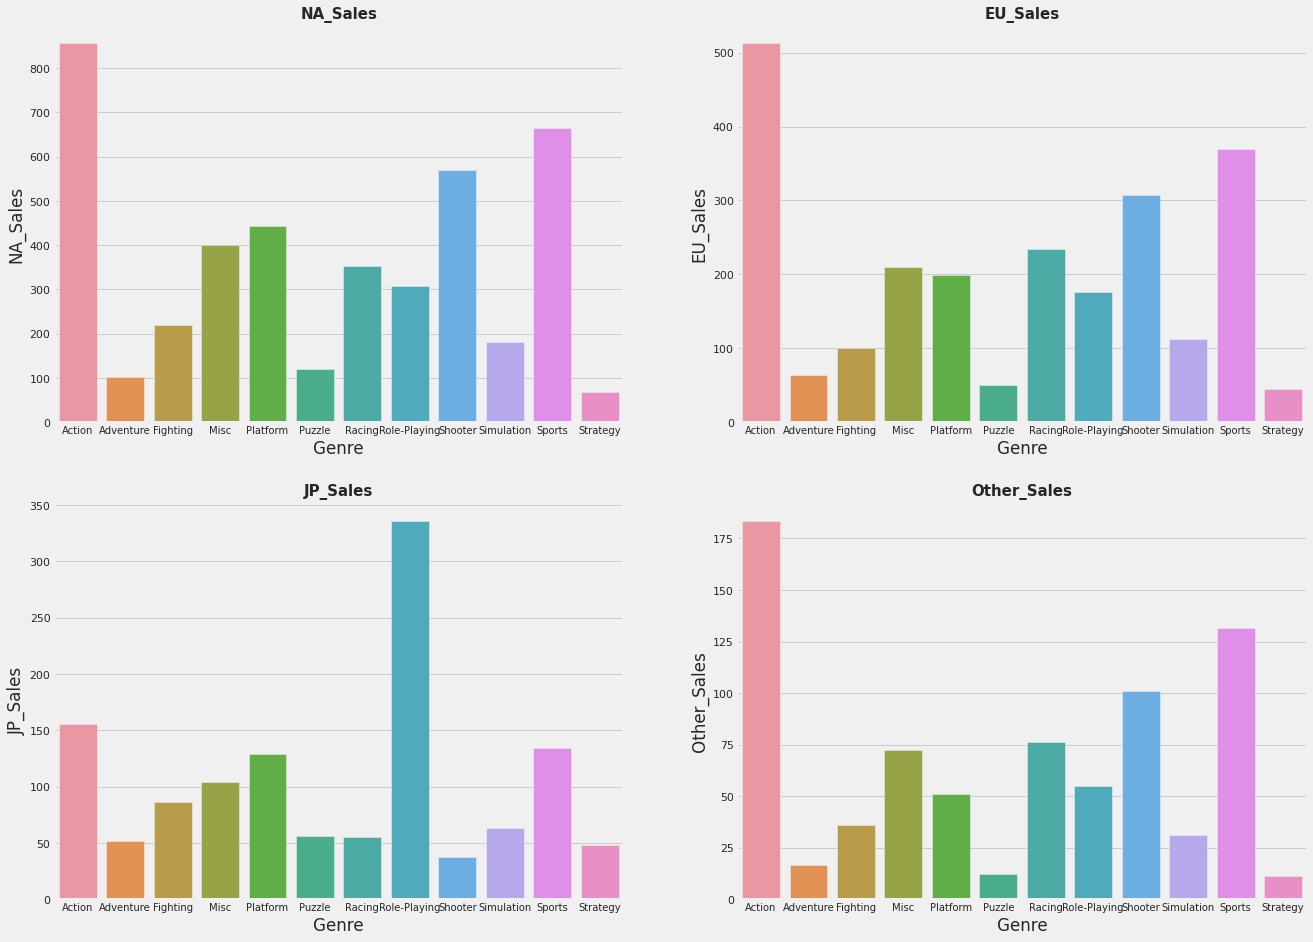

In [ ]:
# 각 그룹별 시각화
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(ncols = 2, nrows = 2, figsize=(20,15))
plt.rc('xtick', labelsize=8)

sns.barplot(data = NA_Sales, x = NA_Sales['Genre'], y = NA_Sales['NA_Sales'], ax= ax[0,0])
ax[0,0].set_title("NA_Sales", fontsize = 15, fontweight = 'bold')



sns.barplot(data = EU_Sales, x = EU_Sales['Genre'], y = EU_Sales['EU_Sales'], ax= ax[0,1])
ax[0,1].set_title("EU_Sales", fontsize = 15, fontweight = 'bold')

sns.barplot(data = JP_Sales, x = JP_Sales['Genre'], y = JP_Sales['JP_Sales'], ax= ax[1,0])
ax[1,0].set_title("JP_Sales", fontsize = 15, fontweight = 'bold')


sns.barplot(data = Other_Sales, x = Other_Sales['Genre'], y = Other_Sales['Other_Sales'], ax= ax[1,1])
ax[1,1].set_title("Other_Sales", fontsize = 15, fontweight = 'bold')


plt.show()

대체적으로 Action > Sports > Shooter 순으로 선호도가 판단되나, 일본의 경우 Role-Playing > Action > Sports 순으로 다른 선호도 양상을 나타내고 있다.

# 4. 연도별 게임의 트렌드가 있을까?

---

연도별 게임의 트렌드가 있을까?
- H0: 연도별 게임의 트렌드가 없다
- H1: 연도별 게임의 트렌드가 있다
-> H1 채택시 트렌드가 있으며, 무엇인지 시각화를 통해 확인하기

---


In [ ]:
# 연도별 그룹
Year_group = df_clean.groupby('Year', as_index = False)['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
Year_group

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,10.59,0.67,0.00,0.12
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70
5,1985,33.73,4.74,14.56,0.92
6,1986,12.50,2.84,18.76,1.93
7,1987,8.46,1.41,11.63,0.20
8,1988,23.87,6.59,15.76,0.99
9,1989,45.15,8.44,18.36,1.50


1980~1982년의 일본과 2017년, 2020년의 데이터가 0인 일부 현상을 확인할 수 있는데, 이는 데이터가 부족하여 발생한 현상이라고 판단.

In [ ]:
Year_group['Total_Year']= Year_group['NA_Sales'] + Year_group['EU_Sales'] + Year_group['JP_Sales'] + Year_group['Other_Sales']

In [ ]:
# 연도와 똑같이 ANOVA 분석으로 가설 확인
NA_model_Year = pd.DataFrame(df_clean, columns = ['NA_Sales', 'Year'])
NA_model_YTest = ols('NA_Sales ~ C(Year)', NA_model_Year).fit()

EU_model_Year = pd.DataFrame(df_clean, columns = ['EU_Sales', 'Year'])
EU_model_YTest = ols('EU_Sales ~ C(Year)', EU_model_Year).fit()

JP_model_Year = pd.DataFrame(df_clean, columns = ['JP_Sales', 'Year'])
JP_model_YTest = ols('JP_Sales ~ C(Year)', JP_model_Year).fit()

Other_model_Year = pd.DataFrame(df_clean, columns = ['Other_Sales', 'Year'])
Other_model_YTest = ols('Other_Sales ~ C(Year)', Other_model_Year).fit()

print(anova_lm(NA_model_YTest))
print(anova_lm(EU_model_YTest))
print(anova_lm(JP_model_YTest))
print(anova_lm(Other_model_YTest))

               df        sum_sq   mean_sq          F        PR(>F)
C(Year)      38.0    366.355314  9.640929  14.735445  3.010051e-92
Residual  16188.0  10591.289257  0.654268        NaN           NaN
               df       sum_sq   mean_sq        F    PR(>F)
C(Year)      38.0    22.937955  0.603630  2.33804  0.000006
Residual  16188.0  4179.384014  0.258178      NaN       NaN
               df       sum_sq   mean_sq          F         PR(>F)
C(Year)      38.0   148.851224  3.917137  45.246609  2.576799e-319
Residual  16188.0  1401.444718  0.086573        NaN            NaN
               df      sum_sq   mean_sq         F    PR(>F)
C(Year)      38.0    3.243021  0.085343  2.367996  0.000004
Residual  16188.0  583.415983  0.036040       NaN       NaN


p-value가 유의수준 0.05 이하이므로 귀무가설을 기각하고 연도별 게임의 트렌드가 있다고 판단. 

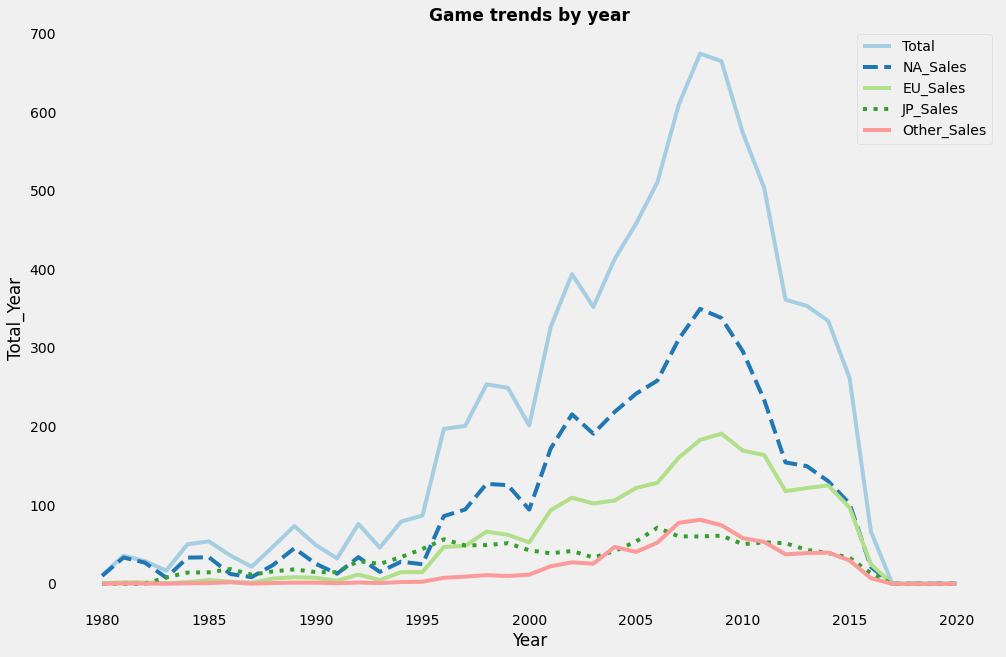

In [ ]:
# 연도별 시각화
plt.style.use('fivethirtyeight')
sns.set_palette('Paired')
fig, ax1 = plt.subplots(figsize = (15,10))
plt.title('Game trends by year', fontdict={'size': 17}, fontweight = 'bold')
sns.lineplot(x = 'Year', y = Year_group['Total_Year'], data= Year_group, ax=ax1, label='Total')
sns.lineplot(x = 'Year', y = Year_group['NA_Sales'], data= Year_group, ax=ax1, linestyle= '--', label = 'NA_Sales')
sns.lineplot(x = 'Year', y = Year_group['EU_Sales'], data= Year_group, ax=ax1, label = 'EU_Sales' )
sns.lineplot(x = 'Year', y = Year_group['JP_Sales'], data= Year_group, ax=ax1, linestyle= ':', label = 'JP_Sales')
sns.lineplot(x = 'Year', y = Year_group['Other_Sales'], data= Year_group, ax=ax1, label = 'Other_Sales' )


ax1.grid()
plt.show()

# 5. 출고량의 높은 게임에 대한 분석 및 시각화 프로세스
---
각 Column별로 판매량 높은 게임 확인

*   Platform
*   Genre
*   Name



>  각각 시각화하여 다음 분기에는 어떤 게임을 설계하면 좋을지 분석
---






In [ ]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16172,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16173,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16174,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16175,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


Text(0.5, 1.0, 'Platform')

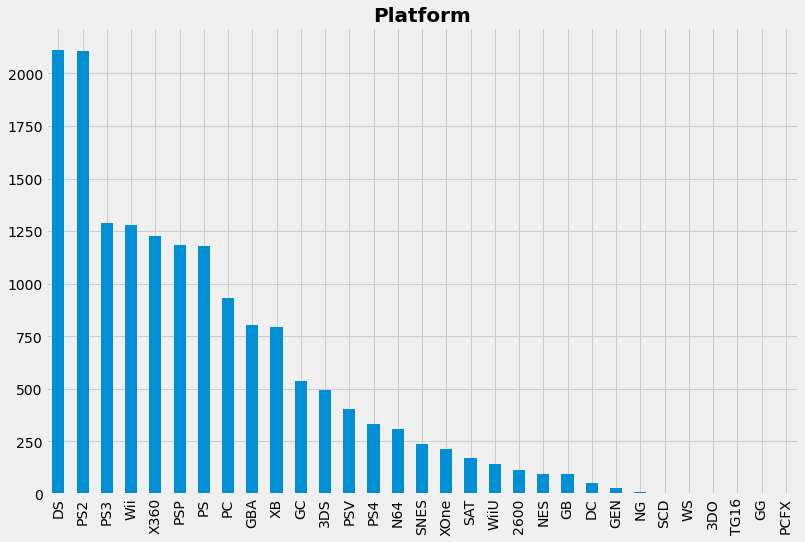

In [ ]:
# 어떤 Platform이 가장 많은가?
plt.style.use('fivethirtyeight')
df_clean_Platform = df_clean.Platform.value_counts()
df_clean_Platform.plot.bar(x = df_clean['Genre'], y= Total_Sales, figsize = (12,8))
plt.title('Platform', fontsize = 20, fontweight = 'bold')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

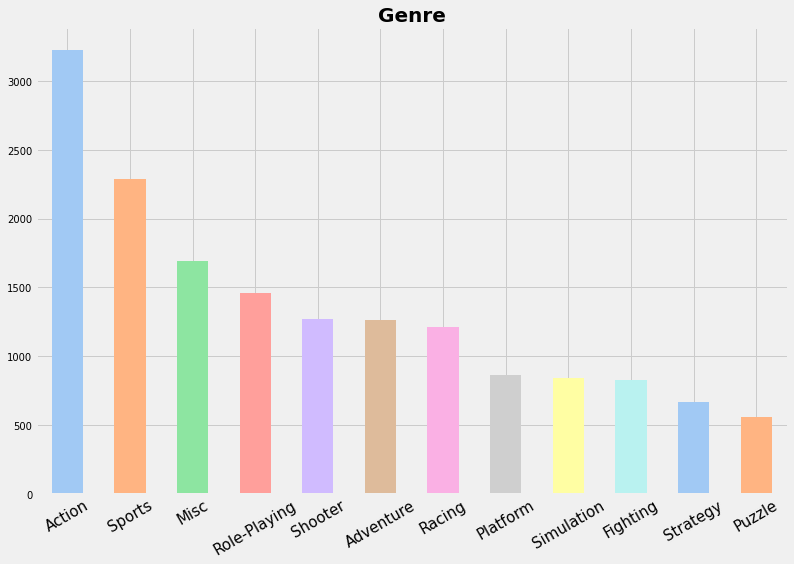

In [ ]:
# 어떤 Genre가 많은가?
# +위에서 분석한 각 나라의 Genre별 판매량 참조하여 분석

plt.style.use('fivethirtyeight')
df_clean_Genre = df_clean.Genre.value_counts()
colors = sns.color_palette('pastel')
df_clean_Genre.plot.bar(x = df_clean['Genre'], y= Total_Sales, figsize = (12,8), color=colors )
plt.title('Genre', fontsize = 20, fontweight = 'bold')
plt.xticks(rotation=30, fontsize=15)

In [ ]:
df_clean['Total_Sales'] = df_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum (axis=1)
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16172,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16173,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16174,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16175,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df_Name = df_clean.groupby('Name')['Total_Sales'].sum().sort_values(ascending=False)
df_Name_10 = df_Name.head(10)

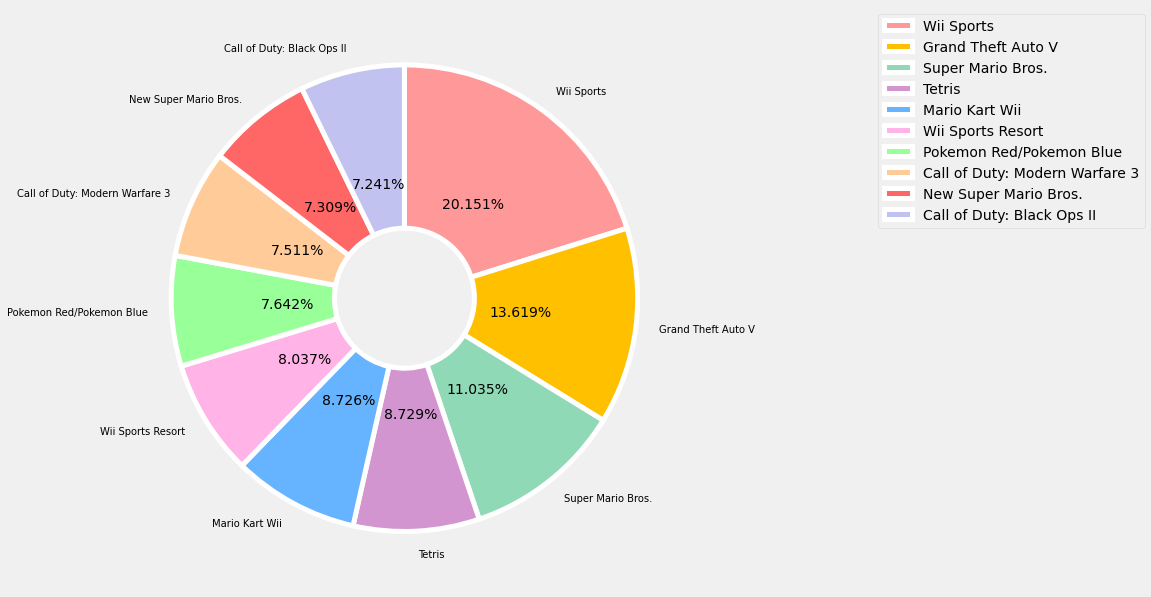

In [ ]:
# 어떤 게임이 많이 팔렸는가?(상위 10개 항목)

pie, ax2 = plt.subplots(figsize=(15,10))
labels = df_Name_10.keys()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#66b3ff','#ffb3e6','#99ff99','#ffcc99','#ff6666','#c2c2f0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(x=df_Name_10, counterclock=False, labels=labels, autopct='%.3f%%', startangle=90, pctdistance=0.5, wedgeprops=wedgeprops, colors=colors)
plt.legend( bbox_to_anchor=(1.3,1))

Conclusion
- 북미 시장에서 게임 판매가 활발하며, 데이터 부족으로 인한 최근 데이터를 제외했을 때 전체적인 게임 판매량은 지속적으로 활발한 추세를 보일 것으로 확인된다
- 전체적으로 높은 판매량을 유지하고 있는 Action, Sports 류의 게임을 우선적으로 개발하는 것이 적절하며, DS 혹은 PS2 플랫폼 중 더 적절한 것을 선택해야한다
- 예외적으로 일본시장을 겨누고자 한다면, Role-Playing 류의 게임을 고려해야한다
